아래 데이터셋을 기반으로 분류회귀 모델을 완성 후 성능평가까지 구현하세요16. / .  

데이터셋     - : iris.csv  

조건 : 3개 품종 중 2개 선택하여 이진 분류 진행  
회귀 : 3개 품종 중 1개 선택, 4개 피쳐 중 꽃잎의 길이값 예측 회귀


In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
# 1. 데이터 준비
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
# 이진 분류 데이터 준비 setosa , versicolor
binary_df = iris_df[iris_df['species'] != 2]
f_binary = binary_df.drop('species', axis=1)
t_binary = binary_df['species']
print(f_binary.shape, t_binary.shape)

(100, 4) (100,)


In [27]:
# 이진 분류 모델 구현
# 의사결정나무 사용해서 모델 학습
# 데이터셋 분리 (이진분류)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(f_binary, t_binary, test_size=0.3, 
                                                                    random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train_bin, y_train_bin)

# 예측 및 정확도 평가
y_pred_bin = clf.predict(X_test_bin)
accuracy_bin = clf.score(X_test_bin, y_test_bin)
print(f'이진 분류 정확도 : {accuracy_bin:.4f}')

이진 분류 정확도 : 1.0000


In [28]:
# virginica 품종의 회귀 데이터 준비
virginica_df = iris_df[iris_df['species'] == 2]
f_virginica = virginica_df.drop(['species', 'petal length (cm)'], axis=1)
t_virginica = virginica_df['petal length (cm)'] # 꽃잎의 길이 타겟
print(f_virginica.shape, t_virginica.shape)

(50, 3) (50,)


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [30]:
# 스케일링
mysclaer = StandardScaler()
sclaed = mysclaer.fit_transform(f_virginica)



In [31]:
# 데이터셋 분리 꽃잎 길이 예측
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(f_virginica, t_virginica, test_size=0.3, random_state=42)

# 모델 생성 및 학습
reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)

# 예측 및 평가
y_pred_reg = reg_model.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f'회귀 모델 MSE : {mse:.4f}')

회귀 모델 MSE : 0.0755


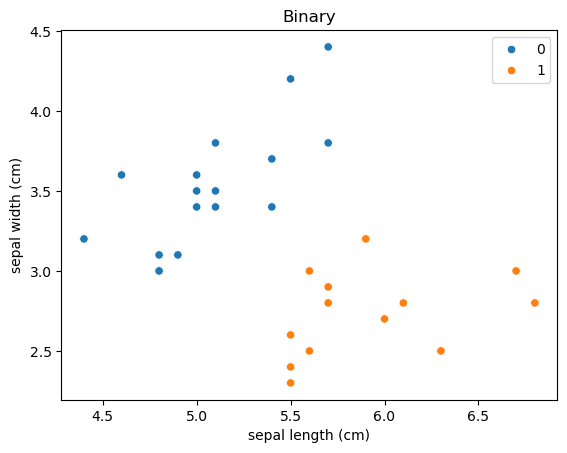

In [34]:
# 시각화
sns.scatterplot(x=X_test_bin['sepal length (cm)'], y=X_test_bin['sepal width (cm)'], hue=y_pred_bin)
plt.title('Binary')
plt.show()

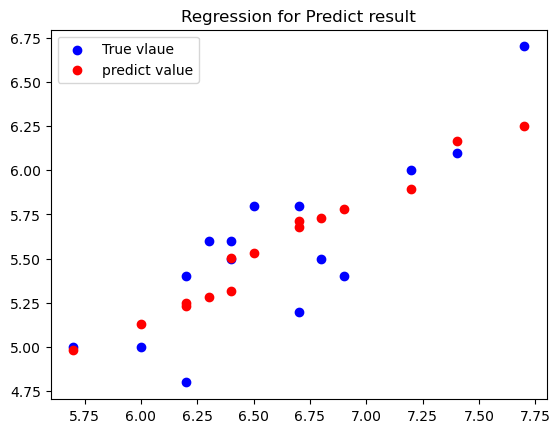

In [35]:
# 회귀 결과 시각화
plt.scatter(X_test_reg['sepal length (cm)'], y_test_reg, color='blue', label='True vlaue')
plt.scatter(X_test_reg['sepal length (cm)'], y_pred_reg, color='red', label='predict value')
plt.title('Regression for Predict result')
plt.legend()
plt.show()
